# Hands-on TEMPO Training

---
author: Barron H. Henderson
date: 2025-01-27
location: HAQAST Showcase 2025
---

This training uses RSIG to easily and quickly access and analyze TEMPO data.

Goals:

1. Install and import libraries
2. Explore and find data.
3. Compare TEMPO to observed NO2
4. Create a TEMPO map
5. Create a TEMPO Surface NO2 product
6. Adapt other tutorials

## Step 1: Install prerequisites

* pandas is for tables
* xarray is for gridded data
* matplotlib is for plotting
* netcdf4 is for when RSIG returns NetCDF files
* pyproj is for coordinate projections
* pyrsig is for getting data
* pycno is for simple map overlays


In [1]:
!python -m pip install -qq pandas xarray matplotlib netcdf4 pyproj pyrsig pycno

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.0 MB/s eta 0:00:00


Now import the libraries.

_If you get a `ModuleNotFoundError:`, try restarting the kernel._

In [2]:
# Import Libraries
import pyproj
import xarray as xr
import pyrsig
import pandas as pd
import pycno
import getpass
import matplotlib.pyplot as plt

# Step 2: Exploring Data

* Import libraries
* Prepare a pyrsig object

In [3]:
# Choosing a Northeast domain for 2023 December 18th
# Dec 18th is in the public data.
locname = 'nyc'
bbox = (-74.8, 40.32, -71.43, 41.4)
bdate = '2023-12-18'

In [4]:
api = pyrsig.RsigApi(bdate=bdate, bbox=bbox, workdir=locname, gridfit=True)
# api_key = getpass.getpass('Enter TEMPO key (anonymous if unknown):')
api_key = 'anonymous'  # using public, so using anonymous
api.tempo_kw['api_key'] = api_key

In [5]:
# after the cell runs, click on the table button.
# Then use filters to find tempo data producs by names that start with tempo
descdf = api.descriptions()
descdf
# descdf.query('name.str.contains("tempo")')

,name,label,description,bbox_str,beginPosition,timeResolution,endPosition,prefix
0,airnow.pm25,pm25(ug/m3),UTC hourly mean surface measured particulate m...,-157 21 -51 59,2003-01-02T00:00:00Z,PT1H,now,airnow
1,airnow.pm10,pm10(ug/m3),UTC hourly mean surface measured particulate m...,-157 21 -51 59,2003-01-02T00:00:00Z,PT1H,now,airnow
2,airnow.ozone,ozone(ppb),UTC hourly mean surface measured ozone concent...,-157 21 -51 64,2003-01-02T00:00:00Z,PT1H,now,airnow
3,airnow.no,no(ppb),UTC hourly mean surface measured nitric oxide ...,-157 21 -51 64,2003-01-02T00:00:00Z,PT1H,now,airnow
4,airnow.no2,no2(ppb),UTC hourly mean surface measured nitrogen diox...,-157 21 -51 64,2003-01-02T00:00:00Z,PT1H,now,airnow
...,...,...,...,...,...,...,...,...
8227,nldas.pressure,pressure(Pa),Modeled North American Land Data Assimilation ...,-180 -90 180 90,20110824T00:00:00Z,PT1D,now,nldas
8228,nldas.humidity,humidity(kg/kg),Modeled North American Land Data Assimilation ...,-180 -90 180 90,20110824T00:00:00Z,PT1D,now,nldas
8229,nldas.temperature,temperature(K),Modeled North American Land Data Assimilation ...,-180 -90 180 90,20110824T00:00:00Z,PT1D,now,nldas
8230,nldas.wind,wind(m/s),Modeled North American Land Data Assimilation ...,-180 -90 180 90,20110824T00:00:00Z,PT1D,now,nldas


In [6]:
tempokey = 'tempo.l2.no2.vertical_column_troposphere'

In [7]:
# By default, the pyrsig uses 'ascii' backend, but 'xdr' is faster;
# both look the same in python, but the files are very different.
# I'm using xdr here for speed
df = api.to_dataframe(tempokey, backend='xdr')
df

,Timestamp(UTC),LONGITUDE(deg),LATITUDE(deg),no2_vertical_column_troposphere(molecules/cm2),Longitude_SW(deg),Longitude_SE(deg),Longitude_NW(deg),Longitude_NE(deg),Latitude_SW(deg),Latitude_SE(deg),Latitude_NW(deg),Latitude_NE(deg)
0,2023-12-18T15:11:00+0000,-73.316078,41.398060,3.093594e+15,-73.281212,-73.344002,-73.288191,-73.351015,41.410378,41.407287,41.388793,41.385610
1,2023-12-18T15:11:00+0000,-72.758522,41.398186,7.423907e+13,-72.723591,-72.786112,-72.730680,-72.793116,41.410442,41.408224,41.389041,41.386914
2,2023-12-18T15:11:00+0000,-72.820793,41.396824,4.233557e+14,-72.786112,-72.848591,-72.793116,-72.855520,41.408224,41.406334,41.386914,41.385095
3,2023-12-18T15:11:00+0000,-72.883331,41.394588,1.407843e+15,-72.848591,-72.911537,-72.855520,-72.918381,41.406334,41.403631,41.385095,41.382483
4,2023-12-18T15:11:00+0000,-72.946648,41.391434,3.048500e+15,-72.911537,-72.974806,-72.918381,-72.981564,41.403631,41.400612,41.382483,41.379558
...,...,...,...,...,...,...,...,...,...,...,...,...
890,2023-12-18T18:18:00+0000,-73.764481,40.330441,5.616886e+15,-73.730804,-73.792147,-73.737051,-73.798367,40.341922,40.339574,40.321104,40.318759
891,2023-12-18T18:18:00+0000,-73.826035,40.327888,4.467097e+15,-73.792147,-73.853292,-73.798367,-73.859488,40.339574,40.337360,40.318759,40.316548
892,2023-12-18T18:18:00+0000,-73.886749,40.326015,8.049984e+15,-73.853292,-73.913992,-73.859488,-73.920162,40.337360,40.335357,40.316548,40.314547
893,2023-12-18T18:18:00+0000,-73.947411,40.323883,1.004033e+16,-73.913992,-73.975153,-73.920162,-73.981304,40.335357,40.333200,40.314547,40.312383


In [8]:
# Do it again, but cleanup the keys and add time object
# Notice that the file is reused
df = api.to_dataframe(tempokey, unit_keys=False, parse_dates=True, backend='xdr')
df

Using cached: nyc/tempo.l2.no2.vertical_column_troposphere_2023-12-18T000000Z_2023-12-18T235959Z.xdr.gz


,Timestamp,LONGITUDE,LATITUDE,no2_vertical_column_troposphere,Longitude_SW,Longitude_SE,Longitude_NW,Longitude_NE,Latitude_SW,Latitude_SE,Latitude_NW,Latitude_NE,time
0,2023-12-18T15:11:00+0000,-73.316078,41.398060,3.093594e+15,-73.281212,-73.344002,-73.288191,-73.351015,41.410378,41.407287,41.388793,41.385610,2023-12-18 15:11:00+00:00
1,2023-12-18T15:11:00+0000,-72.758522,41.398186,7.423907e+13,-72.723591,-72.786112,-72.730680,-72.793116,41.410442,41.408224,41.389041,41.386914,2023-12-18 15:11:00+00:00
2,2023-12-18T15:11:00+0000,-72.820793,41.396824,4.233557e+14,-72.786112,-72.848591,-72.793116,-72.855520,41.408224,41.406334,41.386914,41.385095,2023-12-18 15:11:00+00:00
3,2023-12-18T15:11:00+0000,-72.883331,41.394588,1.407843e+15,-72.848591,-72.911537,-72.855520,-72.918381,41.406334,41.403631,41.385095,41.382483,2023-12-18 15:11:00+00:00
4,2023-12-18T15:11:00+0000,-72.946648,41.391434,3.048500e+15,-72.911537,-72.974806,-72.918381,-72.981564,41.403631,41.400612,41.382483,41.379558,2023-12-18 15:11:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,2023-12-18T18:18:00+0000,-73.764481,40.330441,5.616886e+15,-73.730804,-73.792147,-73.737051,-73.798367,40.341922,40.339574,40.321104,40.318759,2023-12-18 18:18:00+00:00
891,2023-12-18T18:18:00+0000,-73.826035,40.327888,4.467097e+15,-73.792147,-73.853292,-73.798367,-73.859488,40.339574,40.337360,40.318759,40.316548,2023-12-18 18:18:00+00:00
892,2023-12-18T18:18:00+0000,-73.886749,40.326015,8.049984e+15,-73.853292,-73.913992,-73.859488,-73.920162,40.337360,40.335357,40.316548,40.314547,2023-12-18 18:18:00+00:00
893,2023-12-18T18:18:00+0000,-73.947411,40.323883,1.004033e+16,-73.913992,-73.975153,-73.920162,-73.981304,40.335357,40.333200,40.314547,40.312383,2023-12-18 18:18:00+00:00


# Step 3: Compare to observations

* Make an hourly average product.
* Make a simple time-series plot
* Do the same with airnow to compare

In [9]:
# Make an hourly average
hdf = df.groupby(pd.Grouper(key='time', freq='1h')).mean(numeric_only=True)
hdf

,LONGITUDE,LATITUDE,no2_vertical_column_troposphere,Longitude_SW,Longitude_SE,Longitude_NW,Longitude_NE,Latitude_SW,Latitude_SE,Latitude_NW,Latitude_NE
time,,,,,,,,,,,
2023-12-18 15:00:00+00:00,-73.283330,40.849232,4.230446e+15,-73.249018,-73.310997,-73.255643,-73.317594,40.860911,40.858619,40.839853,40.837564
2023-12-18 16:00:00+00:00,-73.187944,40.852178,5.531938e+15,-73.153566,-73.215645,-73.160231,-73.222283,40.863865,40.861568,40.842798,40.840506
2023-12-18 17:00:00+00:00,-73.093278,40.857026,6.386307e+15,-73.058850,-73.120997,-73.065552,-73.127672,40.868752,40.866385,40.847680,40.845316
2023-12-18 18:00:00+00:00,-73.111625,40.827774,5.733243e+15,-73.077252,-73.139305,-73.083933,-73.145958,40.839493,40.837118,40.818434,40.816065


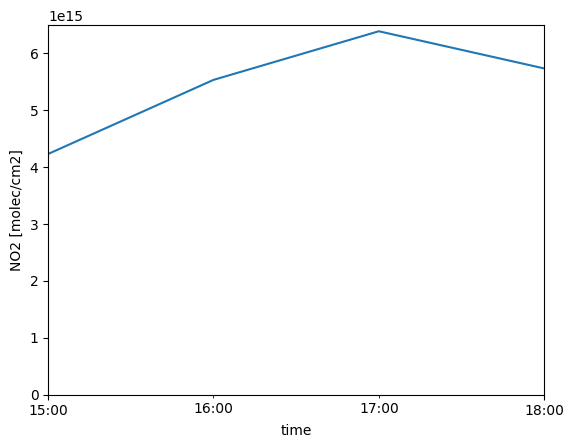

In [10]:
# Plot a data column selected from the names above
tempocol = 'no2_vertical_column_troposphere'
ax = hdf[tempocol].plot(ylim=(0, None), ylabel='NO2 [molec/cm2]')

In [11]:
airnowkey = 'airnow.no2'
adf = api.to_dataframe(airnowkey, unit_keys=False, parse_dates=True)
adf

,Timestamp,LONGITUDE,LATITUDE,STATION,no2,SITE_NAME,time
0,2023-12-18T00:00:00-0000,-73.33690,41.11890,1,5.0,840090019003;42602,2023-12-18 00:00:00+00:00
1,2023-12-18T00:00:00-0000,-72.90269,41.30129,2,16.0,840090090027;42602,2023-12-18 00:00:00+00:00
2,2023-12-18T00:00:00-0000,-73.96610,40.85355,3,15.0,840340030010;42602,2023-12-18 00:00:00+00:00
3,2023-12-18T00:00:00-0000,-74.12608,40.67025,4,12.0,840340170006;42602,2023-12-18 00:00:00+00:00
4,2023-12-18T00:00:00-0000,-74.06657,40.73169,5,20.0,840340171002;42602,2023-12-18 00:00:00+00:00
...,...,...,...,...,...,...,...
211,2023-12-18T23:00:00-0000,-74.06657,40.73169,5,18.0,840340171002;42602,2023-12-18 23:00:00+00:00
212,2023-12-18T23:00:00-0000,-74.42944,40.46218,6,3.0,840340230011;42602,2023-12-18 23:00:00+00:00
213,2023-12-18T23:00:00-0000,-74.67630,40.78763,7,2.0,840340273001;42602,2023-12-18 23:00:00+00:00
214,2023-12-18T23:00:00-0000,-74.20837,40.64144,8,12.0,840340390004;42602,2023-12-18 23:00:00+00:00


<Axes: xlabel='time', ylabel='AirNow NO2 [ppb]'>

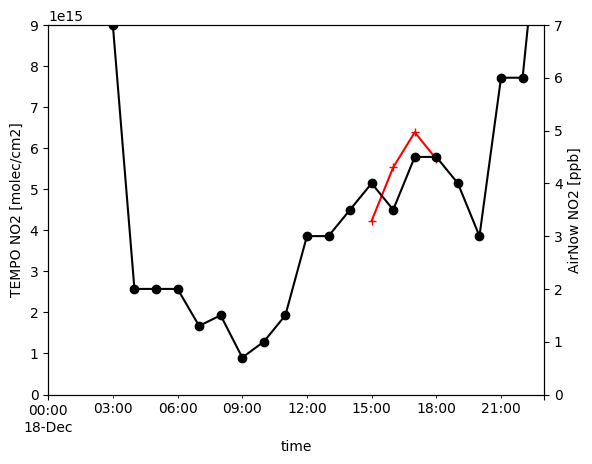

In [12]:
airnowno2 = adf['no2'].groupby(adf['time']).median()
ax = hdf[tempocol].plot(ylabel='TEMPO NO2 [molec/cm2]', color='r', marker='+', ylim=(0, 9e15))
airnowno2.plot(ax=ax.twinx(), color='k', marker='o', ylim=(0, 7), ylabel='AirNow NO2 [ppb]')

# Step 4: Create a TEMPO custom map

* Here we will request similar data, but pregridded.
* This is a custom L3 file on a CMAQ 12km grid.

In [13]:
api.grid_kw

{'GDNAM': '12US1',
 'GDTYP': 2,
 'NCOLS': 21,
 'NROWS': 17,
 'XORIG': 1848000.0,
 'YORIG': 252000.0,
 'XCELL': 12000.0,
 'YCELL': 12000.0,
 'P_ALP': 33.0,
 'P_BET': 45.0,
 'P_GAM': -97.0,
 'XCENT': -97.0,
 'YCENT': 40.0,
 'VGTYP': 7,
 'VGTOP': 5000.0,
 'NLAYS': 35,
 'earth_radius': 6370000.0,
 'g': 9.81,
 'R': 287.04,
 'A': 50.0,
 'T0': 290,
 'P0': 100000.0,
 'REGRID_AGGREGATE': 'None'}

In [14]:
# Now retrieve a NetCDF file with IOAPI coordinates (like CMAQ)
ds = api.to_ioapi(tempokey)
ds

<xarray.Dataset> Size: 138kB
Dimensions:          (TSTEP: 24, VAR: 4, DATE-TIME: 2, LAY: 1, ROW: 17, COL: 21)
Coordinates:
  * TSTEP            (TSTEP) datetime64[ns] 192B 2023-12-18 ... 2023-12-18T23...
  * LAY              (LAY) float32 4B 0.9975
  * ROW              (ROW) float64 136B 0.5 1.5 2.5 3.5 ... 13.5 14.5 15.5 16.5
  * COL              (COL) float64 168B 0.5 1.5 2.5 3.5 ... 17.5 18.5 19.5 20.5
Dimensions without coordinates: VAR, DATE-TIME
Data variables:
    TFLAG            (TSTEP, VAR, DATE-TIME) int32 768B ...
    LONGITUDE        (TSTEP, LAY, ROW, COL) float32 34kB ...
    LATITUDE         (TSTEP, LAY, ROW, COL) float32 34kB ...
    COUNT            (TSTEP, LAY, ROW, COL) int32 34kB ...
    NO2_VERTICAL_CO  (TSTEP, LAY, ROW, COL) float32 34kB ...
Attributes: (12/34)
    IOAPI_VERSION:  1.0 1997349 (Dec. 15, 1997)
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2025027
    CTIME:          1551
    WDATE:          2025027
    ...             ...
    GDNAM:          M_02_99BRACE    
    UPNAM:          XDRConvert      
    VAR-LIST:       LONGITUDE       LATITUDE        COUNT           NO2_VERTI...
    FILEDESC:       http://tempo.si.edu/,TEMPOSubset,XDRConvert              ...
    HISTORY:        XDRConvert
    crs_proj4:      +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=40.0 +lon_0=-97....

In [15]:
# Choose a column from above, notice that names are truncated, so they can be weird
tempoikey = 'NO2_VERTICAL_CO'

/usr/local/lib/python3.11/dist-packages/pycno/__init__.py:538: UserWarning: Downloading: https://www.giss.nasa.gov/tools/panoply/overlays/MWDB_Coasts_NA_1.cnob to /root/.pycno/MWDB_Coasts_NA_1.cnob
  warnings.warn('Downloading: ' + url + ' to ' + str(datapatho))


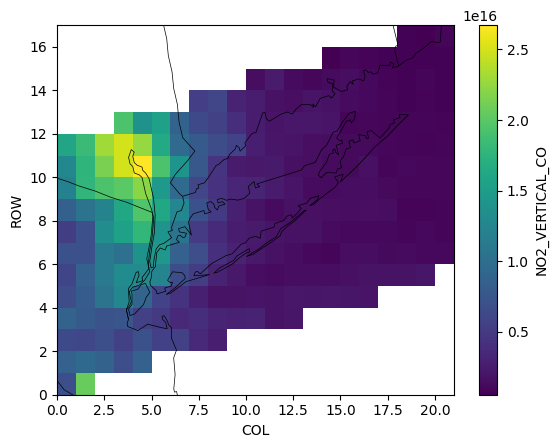

In [16]:
# Now plot a map
cno = pycno.cno(ds.crs_proj4)
qm = ds[tempoikey].where(lambda x: x>0).mean(('TSTEP', 'LAY')).plot()
cno.drawstates(resnum=1)

# Step 5: Make a surface NO2 map

* Download CMAQ EQUATES surface and columns
* Extract CMAQ to gridded TEMPO
* Calculate a transfer function [^1]
* Estimate surface NO2
* Average and make a plot


[1] No warranty expressed or implied!



In [17]:
# Get a column and surface estimate form CMAQ
cmaqcolkey = 'cmaq.equates.conus.integrated.NO2_COLUMN'
qids = api.to_ioapi(cmaqcolkey, bdate='2018-12-21')
cmaqsfckey = 'cmaq.equates.conus.aconc.NO2'
qsds = api.to_ioapi(cmaqsfckey, bdate='2018-12-21')

## Align Grids

To align the grids, we have to convert between lambert projections. This is a little complicated, but pyrsig gives you all the tools you need.

1. get 2d x/y for TEMPO L3 cell centroids
2. get 2d x/y for TEMPO L3 cell centroids on CMAQ grid
3. store for later use
4. pretend the EQUATES data is 2023


In [18]:
# 1. get 2d x/y for TEMPO L3 cell centroids
y, x = xr.broadcast(ds.ROW, ds.COL)
# 2. get 2d x/y for TEMPO L3 cell centroids on CMAQ grid
dstproj = pyproj.Proj(ds.crs_proj4)
srcproj = pyproj.Proj(qids.crs_proj4)
X, Y = srcproj(*dstproj(x.values, y.values, inverse=True))
# 3. store the result for later use
ds['CMAQX'] = ('COL',), X.mean(0)
ds['CMAQY'] = ('ROW',), Y.mean(1)
# 4. here we pretend that the CMAQ times align with the TEMPO times
ds['CMAQT'] = ('TSTEP',), qsds.TSTEP.values

## Extract CMAQ to TEMPO custom L3

* We'll extract data using the CMAQ coordinates
* And, add the data to the TEMPO dataset

In [19]:
# Now we extract the CMAQ at the TEMPO locations
# all extractions will output time, y, x data
dims = ('TSTEP', 'ROW', 'COL')
# all extractions use the same coordinates
selopts = dict(TSTEP=ds['CMAQT'], COL=ds['CMAQX'], ROW=ds['CMAQY'], method='nearest')
# 1 atm is the surface
selopts['LAY'] = 1
# Get CMAQ surface NO2 (NO2), and tropospheric column (NO2_COLUMN)
ds['CMAQ_NO2_SFC'] = dims, qsds['NO2'].sel(**selopts).data, {'units': 'ppb'}
ds['CMAQ_NO2_COL'] = dims, qids['NO2_COLUMN'].sel(**selopts).data * 1e15, {'units': 'molec/cm**2'}

In [20]:
# Calculate the transfer function
ds['CMAQ_SFC2COL'] = ds['CMAQ_NO2_SFC'] / ds['CMAQ_NO2_COL']
ds['CMAQ_SFC2COL'].attrs.update(units='1')
# Calculate the estimate surface NO2
ds['TEMPO_SFC'] = ds['NO2_VERTICAL_CO'] * ds['CMAQ_SFC2COL']
ds['TEMPO_SFC'].attrs.update(units='ppb')

## Now Plot TEMPO-based Surface NO2

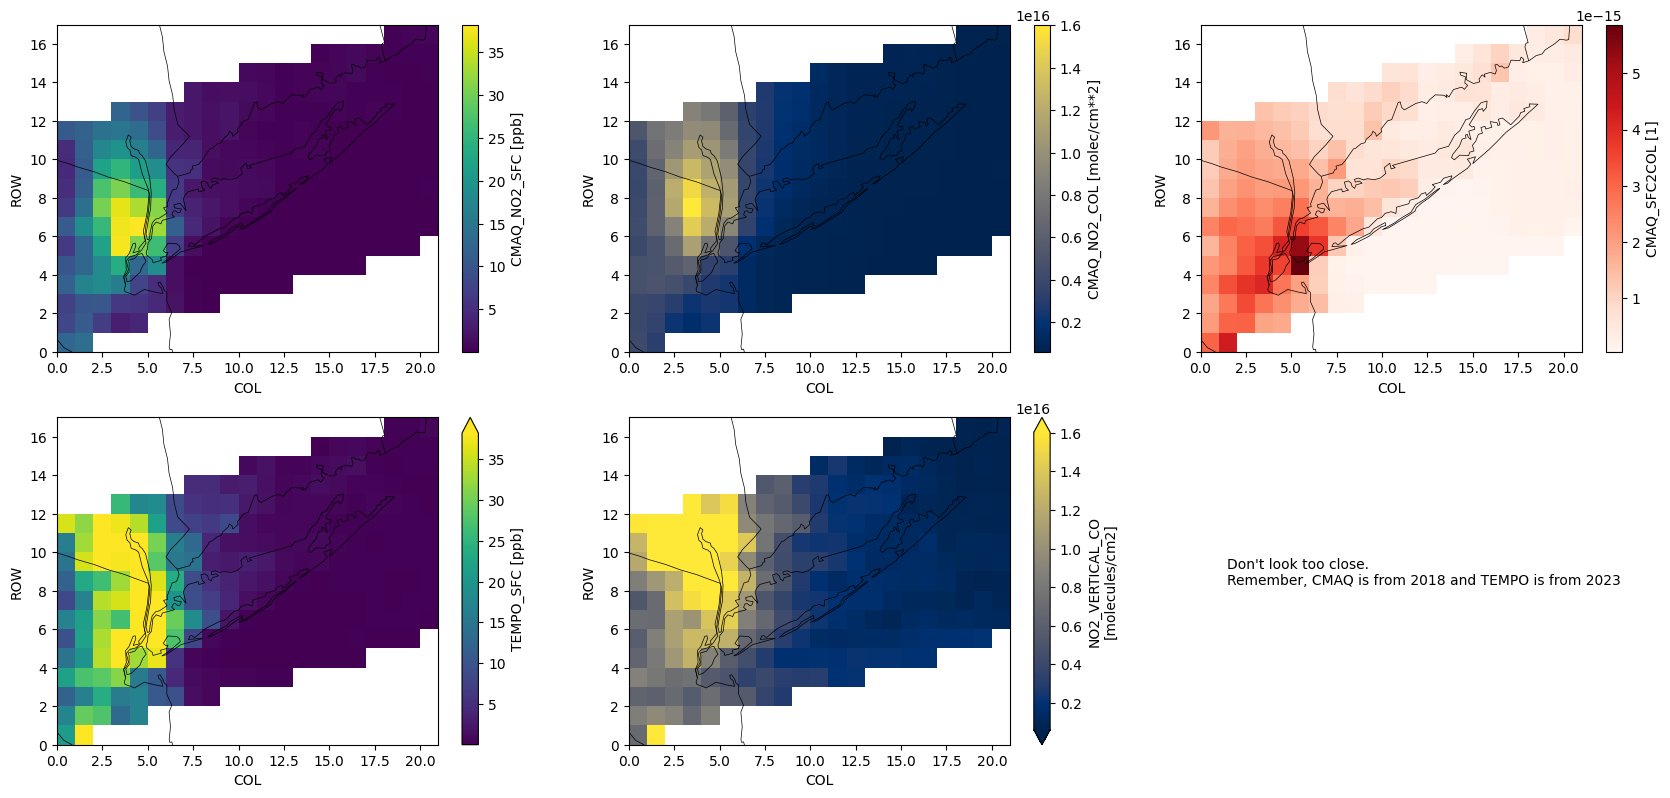

In [21]:
# Now plot the time average
pds = ds.where(ds['NO2_VERTICAL_CO'] > 0).mean(('TSTEP', 'LAY'), keep_attrs=True)

# Controlling figure canvas use
gskw = dict(left=0.05, right=0.95, bottom=0.05, top=0.95)
fig, axx = plt.subplots(2, 3, figsize=(18, 8), gridspec_kw=gskw)

# Put CMAQ on top row : columns 0, 1, and 2
qmsfc = pds['CMAQ_NO2_SFC'].plot(ax=axx[0, 0], cmap='viridis')
qmcol = pds['CMAQ_NO2_COL'].plot(ax=axx[0, 1], cmap='cividis')
pds['CMAQ_SFC2COL'].plot(ax=axx[0, 2], cmap='Reds')
# Put TEMPO on bottom row and use the same colorscales as CMAQ
pds['TEMPO_SFC'].plot(ax=axx[1, 0], norm=qmsfc.norm, cmap=qmsfc.cmap)
pds['NO2_VERTICAL_CO'].plot(ax=axx[1, 1], norm=qmcol.norm, cmap=qmcol.cmap)
# add state overlays (alternatively)
cno.drawstates(ax=axx, resnum=1)
# hide the unused axes
axx[1, 2].set(visible=False)
# add a reminder
_ = fig.text(0.7, 0.25, 'Don\'t look too close.\nRemember, CMAQ is from 2018 and TEMPO is from 2023')


# Step 6: Adapt other tutorials

* Go to https://barronh.github.io/pyrsig
* Navigate to an example you like
* Copy and paste chunks of data
* Then, run them

Below, I did that for the Pittsburg Pandora evaluation

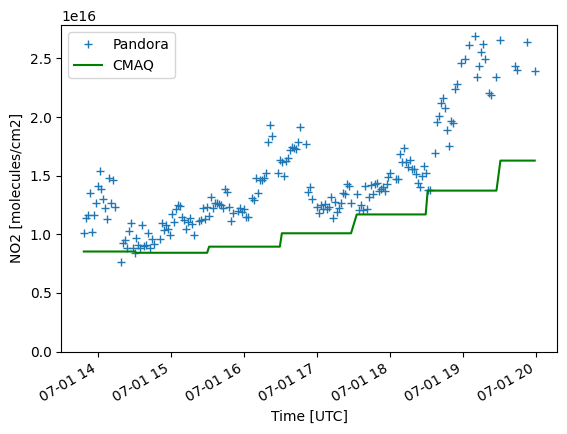

In [22]:
import pyrsig


bbox = (-74.5, 40., -73.5, 41)
cmaqkey = 'cmaq.equates.conus.integrated.NO2_COLUMN'
cmaqcol = 'NO2_COLUMN'
datakey = 'pandora.L2_rnvs3p1_8.nitrogen_dioxide_vertical_column_amount'
datacol = 'nitrogen_dioxide_vertical_column_amount'
# Or use TropOMI or any other NO2 columns data
# datakey = 'tropomi.offl.no2.nitrogendioxide_tropospheric_column'

# Get a CMAQ file from RSIG
api = pyrsig.RsigApi(
    bbox=bbox, bdate='2018-07-01T12', edate='2018-07-01T23:59:59'
)
ds = api.to_ioapi(cmaqkey)

# pair_rsigcmaq will match the CMAQ bbox, bdate, and edate
df = pyrsig.cmaq.pair_rsigcmaq(ds, cmaqcol, datakey)

pdf = df.groupby(['time']).mean(numeric_only=True)
z1 = pdf[datacol]
z2 = (pdf['CMAQ_' + cmaqcol] * 1e15)
ax = z1.plot(marker='+', linestyle='none', label='Pandora')
ax = z2.plot(ax=ax, color='green', label='CMAQ')
ax.legend()
ax.set(ylim=(0, None), ylabel='NO2 [molecules/cm2]', xlabel='Time [UTC]')
ax.figure.savefig('cmaq_pandora.png')

Hopefully, we won't use this...

I archived all the downloads and posted them. If a server is down, we'll just use the archived data

In [23]:
# in case of emergency:
# !wget -N --no-check-certificate https://gaftp.epa.gov/Air/aqmg/bhenders/tutorial_data/pyrsig_tutorial_2024-05.zip
# !unzip pyrsig_tutorial_2024-05.zip
# !mkdir nyc; cd nyc; unzip ../pyrsig_tutorial_2024-05.zip

In [24]:
# import zipfile
# import glob
# paths = glob.glob('*.gz')
# with zipfile.ZipFile('pyrsig_tutorial_2024-05.zip', mode='w') as zf:
#   for p in paths:
#     zf.write(p)